In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")
#titanic_df.describe(include='all')
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")



C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


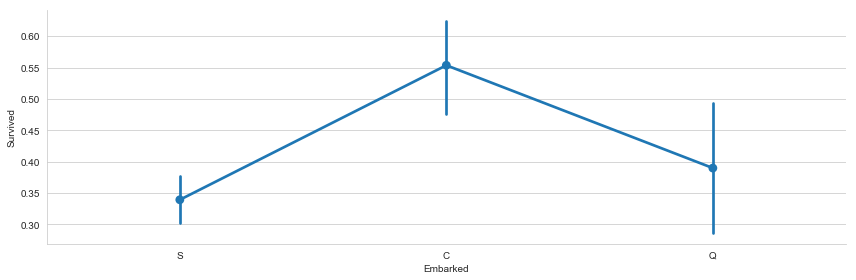

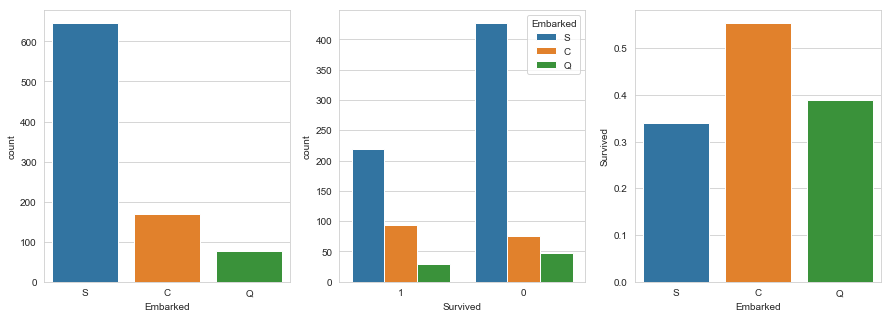

In [67]:
# factorplot= FacetGridとcategorical plotを組み合わせた関数
# FacetGridはPandas DataFrameを特定の構造でmatplotlib figureと結びつけるオブジェクト
sns.factorplot('Embarked','Survived',data=titanic_df,size=4,aspect=3)

#subplots関数の戻り値は、1つのFigureクラスのインスタンスと4つのAxesSubplotクラスのインスタンスであり、それをfigとaxで受け取る
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))

#データの件数を集計し、ヒストグラムとして出力します。
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)



In [68]:
# データを見てみるとEmbarkedのSはデータ数が多いので重要度が低そうだが、C,Qは関係性がありそうなので残す
# ダミー変数はカテゴリーデータを0と1だけで構成されているカテゴリーごとの列データに変換したもののこと
# get_dummies() 引数のデータフレームから0,1だけで構成された列を形成する
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df=titanic_df.join(embark_dummies_titanic)
test_df=test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'],axis=1,inplace=True)
test_df.drop(['Embarked'],axis=1,inplace=True)

# testデータのFareが欠損値が一つあるので中央値を代入する
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
titanic_df['Fare']=titanic_df['Fare'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)


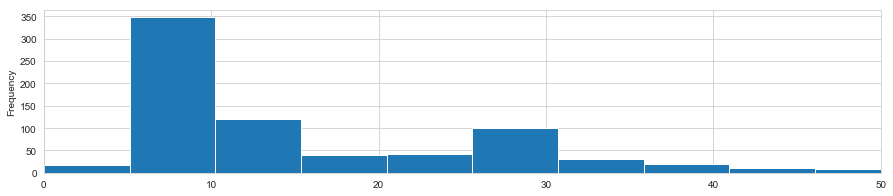

In [69]:
 # Fareの影響力を見るため可視化
fare_not_survived=titanic_df['Fare'][titanic_df['Survived']==0]
fare_survived=titanic_df['Fare'][titanic_df['Survived']==1]

avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

titanic_df['Fare'].plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))


In [70]:
# Ageの欠損値に平均の標準偏差分の領域の値からランダムに選んだ値を代入する
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# np.isnan欠損値np.nanか否かを判定する関数,bool値を返す
titanic_df['Age'][np.isnan(titanic_df['Age'])]=rand_1
test_df['Age'][np.isnan(test_df['Age'])]=rand_2



C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


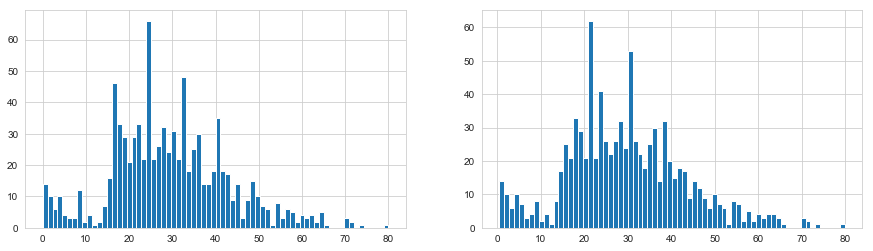

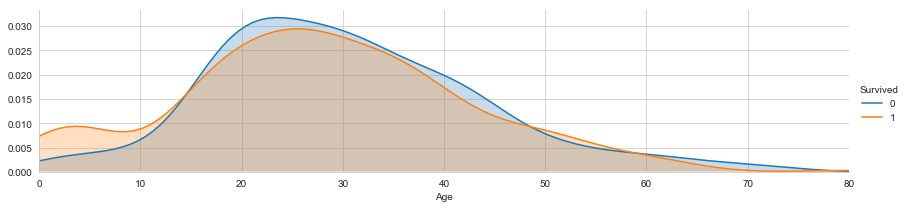

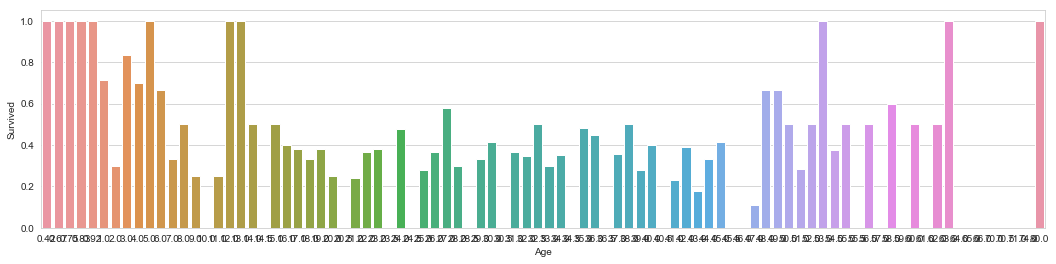

In [71]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,4))
titanic_df['Age'].dropna().astype(int).hist(bins=70,ax=axis1)
titanic_df['Age'].hist(bins=70,ax=axis2)

facet=sns.FacetGrid(titanic_df,hue='Survived',aspect=4)
# .map グラフを作る操作　.kdeplotカーネル密度推定法（KDE)のプロットをする
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_df['Age'].max()))
facet.add_legend()

fig,axis1=plt.subplots(1,1,figsize=(18,4))
average_age=titanic_df[['Age','Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)
                       

In [72]:
#Cabinは欠損値が多いので、消しても影響は少ないはず
titanic_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

titanic_df['Family']=titanic_df['Parch']+titanic_df['SibSp']+1
titanic_df['Family'].loc[titanic_df['Family']>1]=1
titanic_df['Family'].loc[titanic_df['Family']==1]=0

test_df['Family']=test_df['Parch']+test_df['SibSp']+1
test_df['Family'].loc[test_df['Family']>1]=1
test_df['Family'].loc[test_df['Family']==1]=0

titanic_df.drop(['Parch','SibSp'],axis=1)
test_df.drop(['Parch','SibSp'],axis=1)

# 子供の生存率が高いので Male ,Female, Childで分類分けする
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)
# Manは生存率が低いので、情報の重要性が低いので削除
person_dummies_titanic=pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns=['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)




C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


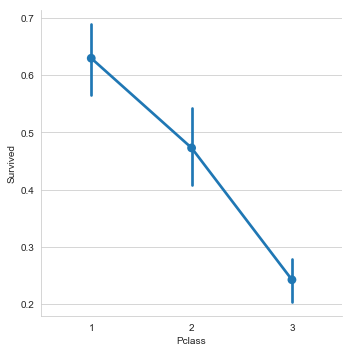

In [73]:
sns.factorplot('Pclass','Survived',order=[1,2,3],data=titanic_df,size=5)

# Pclassのclass_3が生存に与えている影響が小さいので削除する
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [74]:
X_train=titanic_df.drop("Survived",axis=1)
Y_train=titanic_df["Survived"]
X_test=test_df.drop('PassengerId',axis=1).copy()

In [92]:
from xgboost import XGBClassifier
from sklearn import model_selection
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

X_train_original = titanic_df.drop("Survived",axis=1)
Y_train_original = titanic_df["Survived"]
X_test_original = test_df.drop("PassengerId",axis=1).copy()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_original, Y_train_original, test_size=0.4,random_state=3)


submit_rfc = RandomForestClassifier()
submit_rfc = model_selection.GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = 5)
submit_rfc.fit(X_train,Y_train)

Y_pred= submit_rfc.predict(X_test)

submit_rfc.score(X_test,Y_test)

0.8356862102849656

In [87]:
submission=pd.DataFrame({
    'PassengerId':test_df["PassengerId"],
    "Survived":Y_pred
})
submission.to_csv("titanic.csv",index=False)


In [88]:
tes=pd.read_csv("../protos/titanic.csv")
tes.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
# データクレンジングで影響力の小さいものを削除しているから過学習を起こしているのかな？